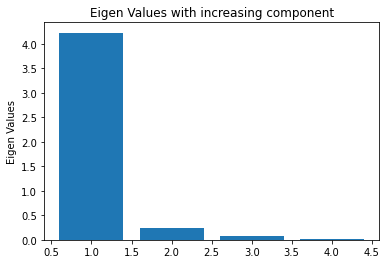

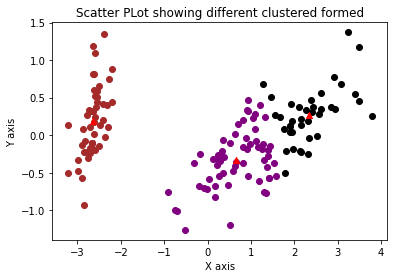

The sum of squared distances of samples to their closest cluster centre (distortion measure):  63.874
The purity score:  0.887


In [10]:
"""
Vikas Dangi
B20238
DS3-Lab 7
"""
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importing the sklearn modules
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Q-1

df=pd.read_csv("Iris.csv")
y_true=df["Species"]
df=df.iloc[:,:4]
# calculating covariance matrix of the data
covM=df.cov()
#calculating the eigen values and vectors
ew, ev = np.linalg.eig(covM)
num=[1,2,3,4]
# Plotting eigen values
plt.bar(num,ew)
plt.title("Eigen Values with increasing component")
plt.ylabel("Eigen Values")
plt.show()


# creating a pca object with 2 components
pca=PCA(n_components=2)
pca.fit(df)
# finally transforming the data
reduced_data=pd.DataFrame(pca.transform(df))


# Q-2

K = 3
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(reduced_data)
reduced_data["label"] = kmeans.labels_

# a

# Plotting the scatter plot
plt.scatter(reduced_data[reduced_data["label"]==0][0], reduced_data[reduced_data["label"]==0][1], color="black")
plt.scatter(reduced_data[reduced_data["label"]==1][0], reduced_data[reduced_data["label"]==1][1], color="brown")
plt.scatter(reduced_data[reduced_data["label"]==2][0], reduced_data[reduced_data["label"]==2][1], color="purple")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color="red", marker="^")
plt.title("Scatter PLot showing different clustered formed")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

# b
print("The sum of squared distances of samples to their closest cluster centre (distortion measure): ",format(kmeans.inertia_, '.3f'))

# c
from sklearn import metrics
from scipy.optimize import linear_sum_assignment

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix=metrics.cluster.contingency_matrix(y_true, y_pred)
    #print(contingency_matrix)
    # Find optimal one-to-one mapping between cluster labels and true labels
    row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
    # Return cluster accuracy
    return contingency_matrix[row_ind,col_ind].sum()/np.sum(contingency_matrix)

print("The purity score: ",format(purity_score(y_true,reduced_data["label"]),'.3f'))


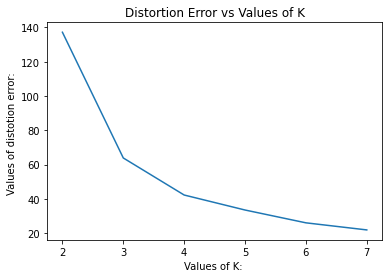

The purity score for different values of K is: 
 [0.6666666666666666, 0.8866666666666667, 0.6933333333333334, 0.68, 0.5066666666666667, 0.5066666666666667]
The optimal value of K using elbow method is: 
 3


In [11]:
# Q-3

# refining our data again
reduced_data=reduced_data.iloc[:,:2]

k=[2, 3, 4, 5, 6, 7]
sse=[]
purity=[]
# Iterating through all the values of K to calculate the distortion and the purity score
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(reduced_data)
    sse.append(kmeans.inertia_)
    purity.append(purity_score(y_true,kmeans.labels_))
# Plotting Distortion Error vs Values of K
plt.plot(k,sse)
plt.xlabel("Values of K: ")
plt.ylabel("Values of distotion error: ")
plt.title("Distortion Error vs Values of K")
plt.show()

print("The purity score for different values of K is: \n",purity)
print("The optimal value of K using elbow method is: \n",3)


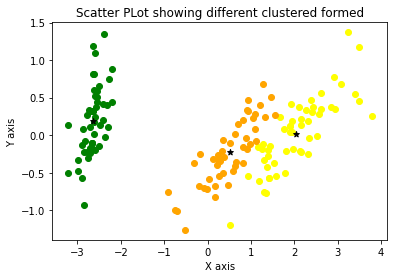

The purity score:  0.980
The total data log likelihood at the last iteration of the GMM as distortion measure:  -280.86956504507964


In [12]:
# Q-4
# Importing Gaussian Mixture module
from sklearn.mixture import GaussianMixture
K = 3
# creating an object to us GMM
gmm = GaussianMixture(n_components = K,random_state=42)
gmm.fit(reduced_data) #fittting the data
reduced_data["label"] = gmm.predict(reduced_data)
# Plotting the scatter plot
plt.scatter(reduced_data[reduced_data["label"]==0][0], reduced_data[reduced_data["label"]==0][1], color="yellow")
plt.scatter(reduced_data[reduced_data["label"]==1][0], reduced_data[reduced_data["label"]==1][1], color="green")
plt.scatter(reduced_data[reduced_data["label"]==2][0], reduced_data[reduced_data["label"]==2][1], color="orange")
plt.scatter(gmm.means_[:,0],gmm.means_[:,1], color="black", marker="*")
plt.title("Scatter PLot showing different clustered formed")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()
# printing result
print("The purity score: ",format(purity_score(y_true,reduced_data["label"]),'.3f'))
reduced_data=reduced_data.iloc[:,:2]
print("The total data log likelihood at the last iteration of the GMM as distortion measure: ",gmm.score(reduced_data)*150)

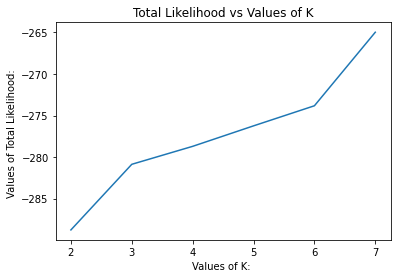

The purity score for different values of K is: 
 [0.6666666666666666, 0.98, 0.8333333333333334, 0.7666666666666667, 0.64, 0.6266666666666667]
The total Likelihood shows us the optimal value as:  3


In [13]:
# Q-5

# Storing all provided values of K
k=[2, 3, 4, 5, 6 ,7]
total_likelihood=[]
purity=[]
# Iterating through all the values of K to calculate the total likelihood and the purity score
for i in k:
    gmm = GaussianMixture(n_components = i, random_state=42)
    gmm.fit(reduced_data)
    label=gmm.predict(reduced_data)
    total_likelihood.append(gmm.score(reduced_data)*150)
    purity.append(purity_score(y_true,label))

# Plotting total likelihood vs values of K
plt.plot(k,total_likelihood)
plt.xlabel("Values of K: ")
plt.ylabel("Values of Total Likelihood: ")
plt.title("Total Likelihood vs Values of K")
plt.show()
# printing results
print("The purity score for different values of K is: \n",purity)
print("The total Likelihood shows us the optimal value as: ",3)

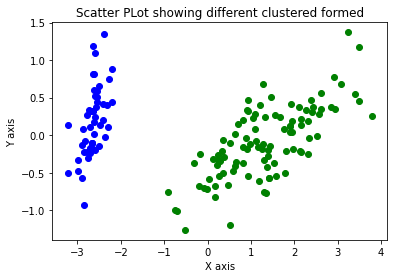

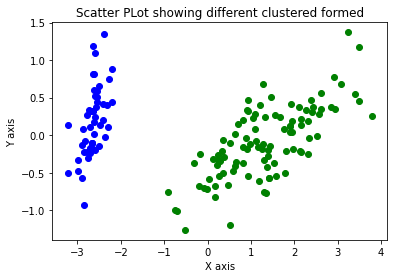

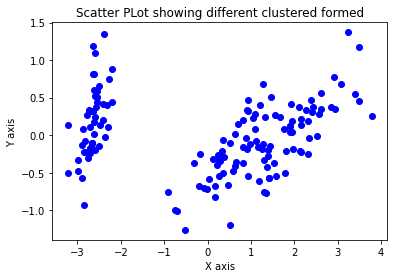

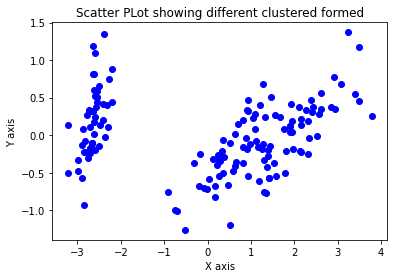

The purity score for different values of K is: 
 [0.6666666666666666, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333]


In [14]:
# Q-6
# storing eps and min_samples provided to us
eps=[1,1,5,5]
min_samples=[4,10,4,10]
purity=[]
from sklearn.cluster import DBSCAN # Importing DBSCAN module
# iterating in all  values of eps and min_samples
for (a,b) in zip(eps,min_samples):
    dbscan_model=DBSCAN(eps=a, min_samples=b).fit(reduced_data)
    reduced_data["label"] = dbscan_model.labels_
    purity.append(purity_score(y_true,reduced_data["label"]))
    # Plotting the scatter plot
    plt.scatter(reduced_data[reduced_data["label"]==0][0], reduced_data[reduced_data["label"]==0][1], color="blue")
    plt.scatter(reduced_data[reduced_data["label"]==1][0], reduced_data[reduced_data["label"]==1][1], color="green")
    plt.scatter(reduced_data[reduced_data["label"]==2][0], reduced_data[reduced_data["label"]==2][1], color="orange")
    plt.title("Scatter PLot showing different clustered formed")
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.show()
# Printing result
print("The purity score for different values of K is: \n",purity)
    